# <span style="color:darkgreen">Surf's Up! - Homework: 10-SQLAlchemy</span>
Author: Jeffery Brown (daddyjab)<br>
Date: 2/3/19


# <span style="color:darkblue">Summary:</span>
* Summary point 1: Target vacation start and end dates (3 to 15 days total duration) and reasons why
<br><br>
* Summary point 2

---

# <span style="color:darkblue">Data Gathered and Plotted</span>
* Data plotted 1
<br><br> 
* Data plotted 2
<br><br>
* Data plotted 3

---

# <span style="color:darkblue">Results</span>

## <span style="color:blue">Result A</span>
* Result point 1 
* Result point 1 

|Plot 1 Title|Plot 2 Title|
|-----------|------------------|
|<img src="Images/plot.png" /> | <img src="Images/plot.png" /> |

* Result point 3
* Result point 4 

---

# <span style="color:blue">Dependencies</span>

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
from pprint import pprint

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# <span style="color:blue">Reflect Tables into SQLAlchemy ORM</span>

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# <span style="color:blue">Data Exploration</span>

In [10]:
insp = inspect(engine)

## Station Data Exploration

In [11]:
# Look at the table schema
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [12]:
s_samp = session.query(Station).limit(5)
for s in s_samp:
        print(f"ID: {s.id}, Station: {s.station}, Name: '{s.name}', Lat: {s.latitude}/Long: {s.longitude}, Elev: {s.elevation}")

ID: 1, Station: USC00519397, Name: 'WAIKIKI 717.2, HI US', Lat: 21.2716/Long: -157.8168, Elev: 3.0
ID: 2, Station: USC00513117, Name: 'KANEOHE 838.1, HI US', Lat: 21.4234/Long: -157.8015, Elev: 14.6
ID: 3, Station: USC00514830, Name: 'KUALOA RANCH HEADQUARTERS 886.9, HI US', Lat: 21.5213/Long: -157.8374, Elev: 7.0
ID: 4, Station: USC00517948, Name: 'PEARL CITY, HI US', Lat: 21.3934/Long: -157.9751, Elev: 11.9
ID: 5, Station: USC00518838, Name: 'UPPER WAHIAWA 874.3, HI US', Lat: 21.4992/Long: -158.0111, Elev: 306.6


In [13]:
s_count = session.query(Station).count()
s_count

9

## Measurement Data Exploration

In [14]:
# Look at the table schema
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [15]:
m_samp = session.query(Measurement).limit(5)
for m in m_samp:
        print(f"ID: {m.id}, Station: {m.station}, Date: {m.date}, Prcp: {m.prcp}, Tobs: {m.tobs}")

ID: 1, Station: USC00519397, Date: 2010-01-01, Prcp: 0.08, Tobs: 65.0
ID: 2, Station: USC00519397, Date: 2010-01-02, Prcp: 0.0, Tobs: 63.0
ID: 3, Station: USC00519397, Date: 2010-01-03, Prcp: 0.0, Tobs: 74.0
ID: 4, Station: USC00519397, Date: 2010-01-04, Prcp: 0.0, Tobs: 76.0
ID: 5, Station: USC00519397, Date: 2010-01-06, Prcp: None, Tobs: 73.0


In [16]:
m_count = session.query(Measurement).count()
m_count

19550

# <span style="color:blue">Climate Analysis</span>

## Precipitation Analysis

In [17]:
# Determine the oldest and newest dates in the measurement data
m_date_info = session.query(func.max(Measurement.date), func.min(Measurement.date))
m_date_max, m_date_min = m_date_info[0]
print(f"Oldest Date: {m_date_min}, Newest Date: {m_date_max}")

Oldest Date: 2010-01-01, Newest Date: 2017-08-23


In [18]:
# Determine the 12 month date window needed for the query
# Calc the End date of the 12 month period
m_date_end = dt.datetime.strptime(m_date_max, "%Y-%m-%d")
m_date_end

datetime.datetime(2017, 8, 23, 0, 0)

In [19]:
# Calc the Start date of the 12 month period
m_date_start = m_date_end - dt.timedelta(days=365)
m_date_start

datetime.datetime(2016, 8, 23, 0, 0)

In [20]:
# Query 12 months of precipitation data - columns: date and pcrp, ordered by: date
# Aggregate across multiple stations on the same date using average
results = session.query(Measurement.date, func.avg(Measurement.prcp))\
                    .filter(Measurement.date >= m_date_start, Measurement.date <= m_date_end)\
                    .group_by(Measurement.date)\
                    .order_by(Measurement.date).all()
for r in results:
    print(r)

('2016-08-24', 1.5549999999999997)
('2016-08-25', 0.07714285714285715)
('2016-08-26', 0.016666666666666666)
('2016-08-27', 0.06399999999999999)
('2016-08-28', 0.5166666666666666)
('2016-08-29', 0.24333333333333332)
('2016-08-30', 0.011666666666666667)
('2016-08-31', 0.6359999999999999)
('2016-09-01', 0.006)
('2016-09-02', 0.05)
('2016-09-03', 0.254)
('2016-09-04', 0.276)
('2016-09-05', 0.08499999999999999)
('2016-09-06', 0.246)
('2016-09-07', 0.3333333333333333)
('2016-09-08', 0.07666666666666667)
('2016-09-09', 0.17833333333333332)
('2016-09-10', 0.27999999999999997)
('2016-09-11', 0.25)
('2016-09-12', 0.308)
('2016-09-13', 0.45166666666666666)
('2016-09-14', 2.3800000000000003)
('2016-09-15', 0.8266666666666667)
('2016-09-16', 0.11714285714285715)
('2016-09-17', 0.13599999999999998)
('2016-09-18', 0.10600000000000001)
('2016-09-19', 0.064)
('2016-09-20', 0.14714285714285716)
('2016-09-21', 0.19499999999999998)
('2016-09-22', 0.2057142857142857)
('2016-09-23', 0.22428571428571428)
('2

In [21]:
# Load the query results into a DataFrame, set index to the date column, sort by date
m_precip = pd.DataFrame(results, columns=['Date', 'Precipitation']).set_index(keys='Date').sort_values(by='Date')
m_precip.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [22]:
# Create xtick marks and labels
# @TODO: Find a more efficient way of plotting x-axis labels only every so often
n_ticks = 12
n_values = len(m_precip.index)
n_interval = int(n_values / n_ticks)

xtick_labels = []
for i in range(n_values):
    if i % n_interval == 0:
        xtick_labels.append(m_precip.index[i])
    else:
        xtick_labels.append("")

#print(xtick_labels)

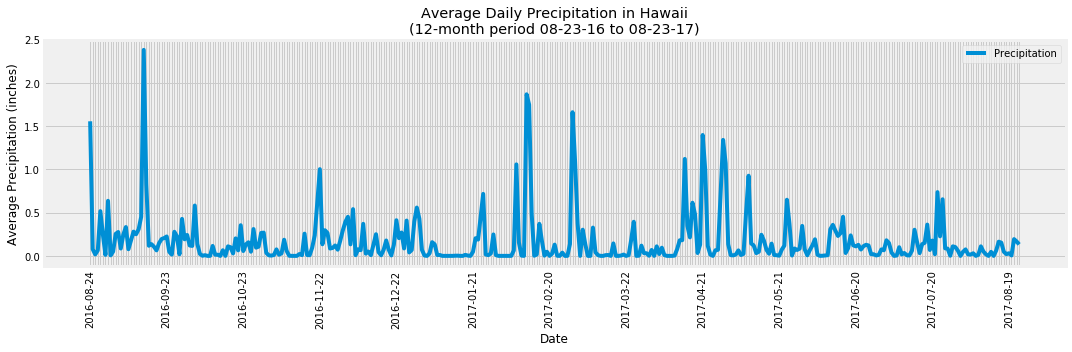

In [23]:
# Plot the results as a line graph
ax = m_precip.plot(y='Precipitation', figsize=(15,5),         
              title="Average Daily Precipitation in Hawaii" + chr(10) + f"(12-month period {m_date_start:%m-%d-%y} to {m_date_end:%m-%d-%y})")
ax.set_ylabel("Average Precipitation (inches)")
ax.set_xlabel("Date")
#ax.set_xticks(range(n_values))
ax.set_xticks(range(len(m_precip.index)))
ax.set_xticklabels(xtick_labels, rotation=90)

plt.tight_layout()
plt.show()

In [24]:
m_precip.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


## Station Analysis

In [25]:
# Query to calculate the total number of stations
s_count = session.query(Station.station).group_by(Station.station).count()
print(s_count)

9


In [26]:
# Find the most active stations (i.e., highest number of observations)
s_actives = session.query(Measurement.station, func.count(Measurement.id))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.id).desc())
for s in s_actives:
    print(s)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [27]:
# Find the one station with the highest number of observations
s_mostactive = session.query(Measurement.station)\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.id).desc())\
                        .limit(1)
#for s in s_mostactive:
s_mostactive = s_mostactive[0][0]
print(s_mostactive)

USC00519281


In [28]:
# Query 12 months of temperature data at the most active station
# - columns: date and tobs, ordered by: date
# Aggregate across multiple stations on the same date using average
results = session.query(Measurement.date, func.avg(Measurement.tobs))\
                    .filter(Measurement.date >= m_date_start, Measurement.date <= m_date_end)\
                    .filter(Measurement.station == s_mostactive)\
                    .group_by(Measurement.date)\
                    .order_by(Measurement.date).all()
for r in results:
    print(r)

('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09', 72.0)
('2016-10-10'

In [29]:
# Load the query results into a DataFrame, set index to the date column, sort by date
m_temp = pd.DataFrame(results, columns=['Date', 'Temperature']).set_index(keys='Date').sort_values(by='Date')
m_temp.head()

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


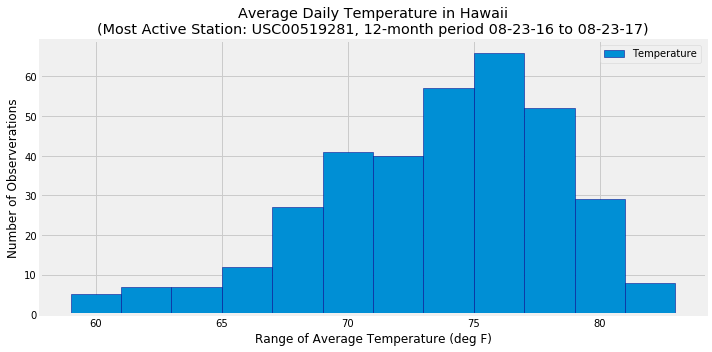

In [30]:
# Plot the results as a histogram with bins=12
ax = m_temp.plot.hist(by='Temperature', bins=12, figsize=(10,5), edgecolor='darkblue',
              title="Average Daily Temperature in Hawaii" + chr(10) + f"(Most Active Station: {s_mostactive}, 12-month period {m_date_start:%m-%d-%y} to {m_date_end:%m-%d-%y})")
ax.set_ylabel("Number of Observerations")
ax.set_xlabel("Range of Average Temperature (deg F)")
plt.tight_layout()
plt.show()

# <span style="color:blue">Optional: Additional Climate Analysis</span>

## Optional: Temperature Analysis

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [47]:
# Based upon Precipitation data, select Trip:
# 2-week interval: 2019-07-01 through 2019-07-14
date_trip_start = dt.date(2019, 7,1)
date_trip_end = dt.date(2019,7,14)
print(f"Trip to Hawaii is planned for {date_trip_start:%A %m-%d-%y} through {date_trip_end:%A %m-%d-%y}")

Trip to Hawaii is planned for Monday 07-01-19 through Sunday 07-14-19


In [120]:
# Use the calc_temps function to calculate temperature statistics for the same timeframe during a prior year
# NOTE: There are no observations in 2018 during the target trip timeframe, so use 2017 data
p_date_start = date_trip_start - dt.timedelta(days=(365*2))
p_date_end = date_trip_end - dt.timedelta(days=(365*2))
print(f"Data will be analyzed from the period: {p_date_start:%m-%d-%y} through {p_date_end:%m-%d-%y}")

Data will be analyzed from the period: 07-01-17 through 07-14-17


In [116]:
# (p_temp_min, p_temp_avg, p_temp_max) = calc_temps(p_date_start, p_date_end)
results = calc_temps(p_date_start, p_date_end)
p_temp_min, p_temp_avg, p_temp_max = results[0]
plot_label_text = f"Max. Temp: {p_temp_max:.1f} deg F" + chr(10) \
                    + f"Avg. Temp: {p_temp_avg:.1f} deg F" + chr(10) \
                    + f"Min. Temp: {p_temp_min:.1f} deg F"
print(plot_label_text)


Max. Temp: 87.0 deg F
Avg. Temp: 78.1 deg F
Min. Temp: 69.0 deg F


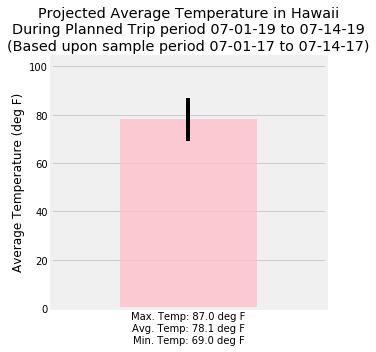

In [117]:
# Plot this temperature data as a bar chart with error bars based upon max and min temps
ax = plt.figure(figsize=(5,5))

plt.bar(x=[ plot_label_text ],
             height=[ p_temp_avg ],
             yerr=[ (p_temp_max-p_temp_avg, p_temp_avg-p_temp_min) ], color='pink', alpha=0.8)
plt.title("Projected Average Temperature in Hawaii" + chr(10)
          + f"During Planned Trip period {date_trip_start:%m-%d-%y} to {date_trip_end:%m-%d-%y}" + chr(10)
          + f"(Based upon sample period {p_date_start:%m-%d-%y} to {p_date_end:%m-%d-%y})")
plt.ylabel("Average Temperature (deg F)")
plt.xlim(-.8,.8)
plt.ylim(0, p_temp_max * 1.2)
plt.grid(b=False, which='both', axis='x')
plt.tight_layout()
plt.show()

## Optional: Rainfall Analysis

In [121]:
# Calculate the rainfall per weather station using the same planned trip timeframe during a prior year
# NOTE: There are no observations in 2018 during the target trip timeframe, so use 2017 data
print(f"Trip to Hawaii is planned for {date_trip_start:%A %m-%d-%y} through {date_trip_end:%A %m-%d-%y}")
print(f"Data will be analyzed from the period: {p_date_start:%m-%d-%y} through {p_date_end:%m-%d-%y}")

Trip to Hawaii is planned for Monday 07-01-19 through Sunday 07-14-19
Data will be analyzed from the period: 07-01-17 through 07-14-17


In [134]:
# Query for rainfall per weather station during sample timeframe
results = session.query(Measurement.station, func.avg(Measurement.prcp))\
                    .filter(Measurement.date >= p_date_start, Measurement.date <= p_date_end)\
                    .group_by(Measurement.station)\
                    .order_by(func.avg(Measurement.prcp).desc()).all()

print(f"Projected Average Precipitation per Weather Station in Hawaii" + chr(10)
          + f"During Planned Trip period {date_trip_start:%m-%d-%y} to {date_trip_end:%m-%d-%y}" + chr(10)
          + f"(Based upon sample period {p_date_start:%m-%d-%y} to {p_date_end:%m-%d-%y})" + chr(10) )

# Watch for the case where precipitation is reported as "None"
for r in results:
    try:
        print(f"Station: {r[0]}, Avg. Precipitation: {r[1]:.3f}")
    except TypeError:
        print(f"Station: {r[0]}, Avg. Precipitation: {0:.3f}")
        

Projected Average Precipitation per Weather Station in Hawaii
During Planned Trip period 07-01-19 to 07-14-19
(Based upon sample period 07-01-17 to 07-14-17)

Station: USC00516128, Avg. Precipitation: 0.198
Station: USC00519281, Avg. Precipitation: 0.114
Station: USC00513117, Avg. Precipitation: 0.057
Station: USC00514830, Avg. Precipitation: 0.054
Station: USC00519397, Avg. Precipitation: 0.015
Station: USC00519523, Avg. Precipitation: 0.013
Station: USC00517948, Avg. Precipitation: 0.000


## Optional: Daily Normals (Temperature) Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


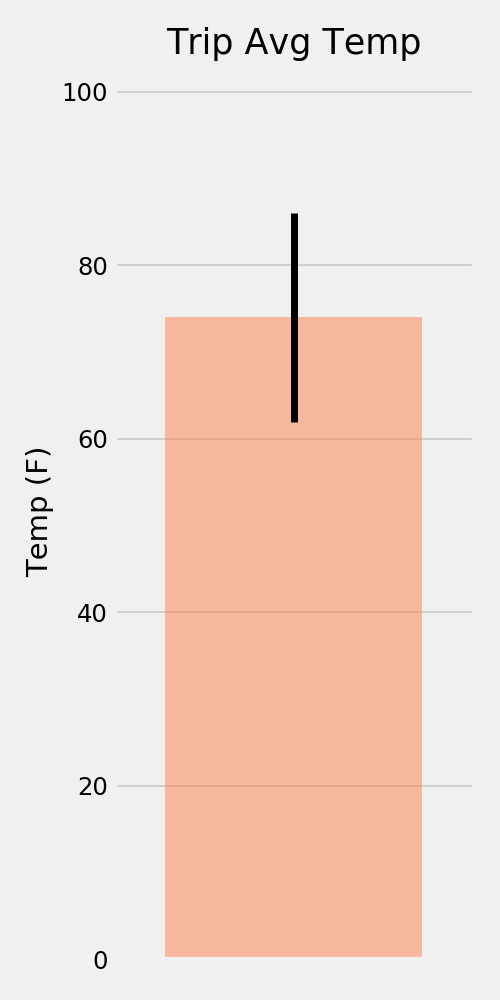

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


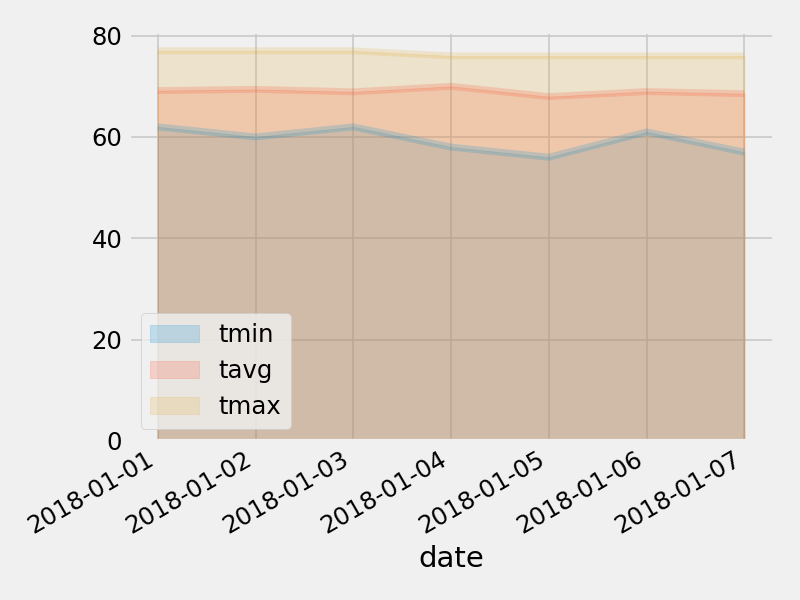

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
